# Random feature model for Helmholtz problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, LinearRegression
import time

from scipy import io
from matplotlib import cm

from RF import *

## High resolution and high data

In [2]:
# Get Data

Inputs = np.load('Helmholtz_inputs.npy')
Outputs = np.load('Helmholtz_outputs.npy')

# transpose it and then it is easy to reshape

Inputs = Inputs.transpose((2,1,0))
Outputs = Outputs.transpose((2,1,0))

# flatten it
Inputs_fl = Inputs.reshape(len(Inputs), 101*101)
Outputs_fl = Outputs.reshape(len(Outputs), 101*101)

# train_test split
Ntrain = 10000
x_train = Inputs_fl[:Ntrain]
x_test = Inputs_fl[Ntrain:]

y_train = Outputs_fl[:Ntrain]
y_test = Outputs_fl[Ntrain:]

# check shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10000, 10201), (10000, 10201), (30000, 10201), (30000, 10201))

In [5]:
########################## Cauchy random feature
# number of features
N = 5000
# scaling parameter gamma
gamma = 1e-4
# generate random feature matrix
x_train_RF, x_test_RF = RF_Cauchy(gamma, N, x_train, x_test)
# train a linear regression model
model = Ridge(alpha=1e-12)
start = time.time()
model.fit(x_train_RF, y_train)
pred = model.predict(x_test_RF)
end = time.time()
# report relative prediction error and clock time
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 2.73e-02.

Clock time is 21.77 seconds


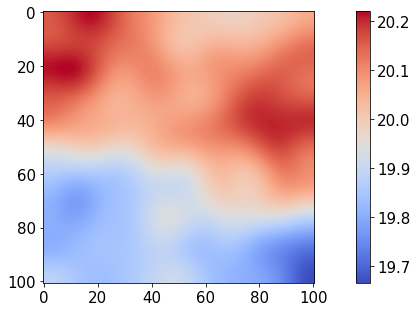

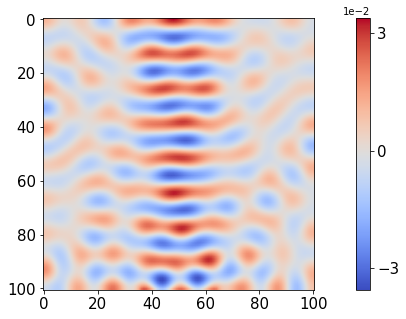

In [16]:
# Visualization of training pairs
idx = 1

# training input
fig, ax = plt.subplots(1,1, figsize=(15,5))
im = ax.imshow(x_train[idx].reshape(101,101), interpolation='bilinear', cmap= "coolwarm")
plt.grid(visible=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = fig.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=15)
plt.savefig('Helmholtz_input.pdf', bbox_inches = 'tight')

# training output
fig, ax = plt.subplots(1,1, figsize=(15,5))
im = ax.imshow(y_train[idx].reshape(101,101), interpolation='bilinear', cmap= "coolwarm")
plt.grid(visible=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = fig.colorbar(im, ax=ax, ticks=[-0.03,0,0.03])
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.tick_params(labelsize=15)
plt.savefig('Helmholtz_output.pdf', bbox_inches = 'tight')

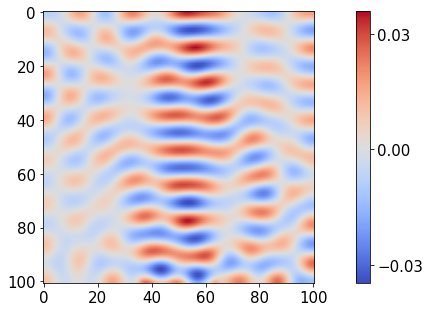

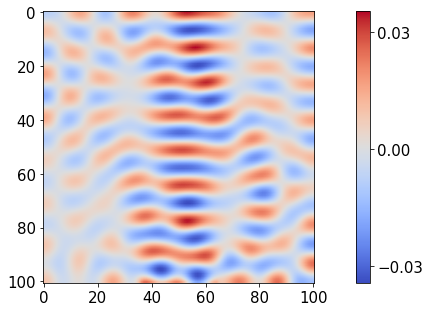

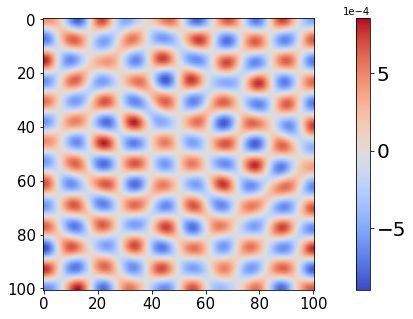

In [19]:
# Visualize the random feature prediction.
idx = 1

test = y_test[idx].reshape(101,101)
prediction = pred[idx].reshape(101,101)
error = prediction - test

# test
fig, ax = plt.subplots(1,1, figsize=(15,5))
im = ax.imshow(test, interpolation='bilinear', cmap= "coolwarm")
plt.grid(visible=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = fig.colorbar(im, ax=ax, ticks=[-0.03,0,0.03])
cbar.ax.tick_params(labelsize=15)
plt.savefig('Helmholtz_test.pdf', bbox_inches = 'tight')

# prediction
fig, ax = plt.subplots(1,1, figsize=(15,5))
im = ax.imshow(prediction, interpolation='bilinear', cmap= "coolwarm")
plt.grid(visible=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = fig.colorbar(im, ax=ax, ticks=[-0.03,0,0.03])
cbar.ax.tick_params(labelsize=15)
plt.savefig('Helmholtz_prediction.pdf', bbox_inches = 'tight')

# pointwise error
fig, ax = plt.subplots(1,1, figsize=(15,5))
im = ax.imshow(error, interpolation='bilinear', cmap= "coolwarm")
plt.grid(visible=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar = fig.colorbar(im, ax=ax, ticks=[-0.0005,0,0.0005])
cbar.formatter.set_powerlimits((0, 0))
cbar.ax.tick_params(labelsize=20)
plt.savefig('Helmholtz_error.pdf', bbox_inches = 'tight')

In [3]:
## Gaussian random feature

from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge

rbf_feature = RBFSampler(gamma=1e-5, n_components = 3000)

X_train_RBF = rbf_feature.fit_transform(x_train)
X_test_RBF = rbf_feature.transform(x_test)

model = Ridge(alpha=1e-12)
start = time.time()
model.fit(X_train_RBF, y_train)
pred = model.predict(X_test_RBF)
end = time.time()
e = np.mean(np.linalg.norm(pred - y_test, axis = 1)/np.linalg.norm(y_test, axis = 1))

print(f'Prediction error is {e:.2e} \n')
print(f'Computation time is {end-start:.2f} seconds')


Prediction error is 2.87e-02 

Computation time is 12.50 seconds


## Low resolution and data: comparison with kernel method

In [54]:
# Get Data

Inputs = np.load('Helmholtz_inputs.npy')
Outputs = np.load('Helmholtz_outputs.npy')

# transpose it and then it is easy to reshape

Inputs = Inputs.transpose((2,1,0))
Outputs = Outputs.transpose((2,1,0))

# subsampling
Inputs = Inputs[:,::4,::4]
Outputs = Outputs[:,::4,::4]

# flatten it

Inputs_fl = Inputs.reshape(len(Inputs), 26*26)
Outputs_fl = Outputs.reshape(len(Outputs), 26*26)

# train_test split
Ntrain = 1000
x_train = Inputs_fl[:Ntrain]
x_test = Inputs_fl[Ntrain:2000]

y_train = Outputs_fl[:Ntrain]
y_test = Outputs_fl[Ntrain:2000]

# check shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((1000, 676), (1000, 676), (1000, 676), (1000, 676))

In [68]:
#### Cauchy random feature
# number of features
N = 5000
# scaling parameter gamma
gamma = 1e-5
# generate random feature matrix
x_train_RF, x_test_RF = RF_Cauchy(gamma, N, x_train, x_test)
# train a linear regression model
model = Ridge(alpha=1e-13)
start = time.time()
model.fit(x_train_RF, y_train)
pred = model.predict(x_test_RF)
end = time.time()
# report relative prediction error and clock time
e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))
print(f'Test error of Cauchy random feature model is {e:.2e}.\n')
print(f'Clock time is {end-start:.2f} seconds')

Test error of Cauchy random feature model is 6.66e-02.

Clock time is 0.16 seconds


In [56]:
## Gaussian random feature

from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge

rbf_feature = RBFSampler(gamma=1e-2, n_components = 20000)

X_train_RBF = rbf_feature.fit_transform(x_train)
X_test_RBF = rbf_feature.transform(x_test)

model = Ridge(alpha=1e-12)
start = time.time()
model.fit(X_train_RBF, y_train)
pred = model.predict(X_test_RBF)
end = time.time()
e = np.mean(np.linalg.norm(pred - y_test, axis = 1)/np.linalg.norm(y_test, axis = 1))

print(f'Prediction error is {e:.2e} \n')
print(f'Computation time is {end-start:.2f} seconds')


Prediction error is 3.63e-02 

Computation time is 0.53 seconds


In [28]:
####################################### Gaussian kernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF

bandwidth = 10
kernel = RBF(length_scale = bandwidth)
model = GaussianProcessRegressor(kernel, alpha = 1e-10) 

start = time.time()
model.fit(x_train, y_train)
end = time.time()
pred = model.predict(x_test)

e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

print(f'Error is {e:.2e}. \n')
print(f'Computation time is {end-start:.2f} seconds')

Error is 0.05046733477701388. 

Computation time is 69.13552188873291 seconds


In [29]:
##################### Matern kernel
kernel = Matern(nu = 2.5, length_scale = 10)
model = GaussianProcessRegressor(kernel, alpha = 1e-10) 

start = time.time()
model.fit(x_train, y_train)
end = time.time()
pred = model.predict(x_test)

e = np.mean(np.linalg.norm(pred - y_test, axis = -1)/np.linalg.norm(y_test, axis = -1))

print(f'Error is {e:.2e}. \n')
print(f'Computation time is {end-start:.2f} seconds')

Error is 0.03763667501133417. 

Computation time is 70.10593509674072 seconds
